<a href="https://colab.research.google.com/github/ssbrahme/stock-prediction/blob/main/python_stock_predict.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [5]:
# description - uses artificial recurrent neural network called Long Short Term Memory (LSTM)
#               to predict closing stock price of a stock, using past 60 day stock price


In [68]:
# import libraries
import math
import pandas_datareader as web
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')


In [69]:
# get the stock quote
df = web.DataReader('AAPL', data_source= 'yahoo', start= '2017-01-01', end= '2021-02-10')

# show the data
df

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2017-06-09,1.380,1.300,1.340,1.350,649500.0,1.350
2017-06-12,1.370,1.320,1.350,1.350,332800.0,1.350
2017-06-13,1.360,1.290,1.320,1.360,430600.0,1.360
2017-06-14,1.350,1.200,1.320,1.300,869600.0,1.300
2017-06-15,1.290,1.210,1.280,1.240,524000.0,1.240
...,...,...,...,...,...,...
2021-02-04,0.308,0.245,0.250,0.288,28493600.0,0.288
2021-02-05,0.325,0.295,0.325,0.300,28567200.0,0.300
2021-02-08,0.320,0.295,0.320,0.305,17667300.0,0.305


In [70]:
# get the shape of the data frame
df.shape

(921, 6)

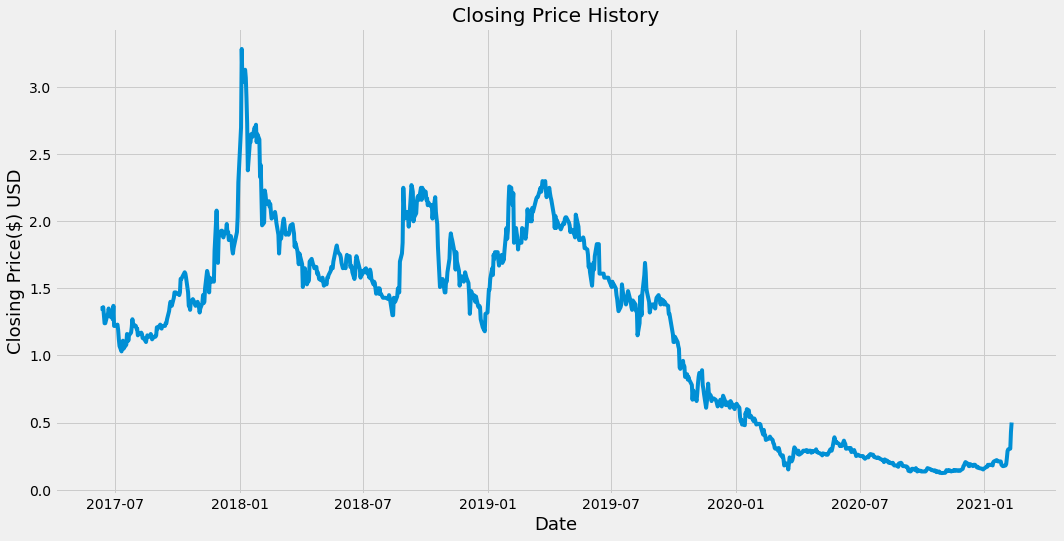

In [71]:
# visualize closing price history
plt.figure (figsize=(16,8))
plt.title ('Closing Price History')
plt.plot(df.Close)
plt.xlabel('Date', fontsize=18)
plt.ylabel('Closing Price($) USD',fontsize=18)
plt.show ()

In [72]:
# create data frame with only 'close' column
data = df.filter(['Close'])

# convert the data frame into numpy array
dataset = data.values

# get number of rows to train the LSTM model 
training_data_len = math.ceil(len(dataset) * 0.8)

training_data_len

737

In [ ]:
# Scale the data
scaler= MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(dataset)

scaled_data

In [74]:
# create scaled training dataset
train_data =  scaled_data[0:training_data_len , :]

# split the data into x_train and y_train datasets
x_train = [] 
y_train = []

for i in range (60, len(train_data)):
  x_train.append(train_data[i-60:i, 0])
  y_train.append(train_data[i,0])
  if i <= 61:
    print(x_train)
    print(y_train)
    print()

[array([0.38804554, 0.38804554, 0.39120809, 0.37223274, 0.35325742,
       0.35325742, 0.37223274, 0.37539529, 0.38804554, 0.37855788,
       0.36907019, 0.36907019, 0.36274508, 0.39437064, 0.34693232,
       0.34693232, 0.35009487, 0.33744466, 0.31530676, 0.299494  ,
       0.28684375, 0.3058191 , 0.31214421, 0.29316886, 0.29633141,
       0.30265655, 0.32795697, 0.32479442, 0.31214421, 0.32479442,
       0.33111952, 0.34376977, 0.36274508, 0.34693232, 0.35009487,
       0.34693232, 0.34060722, 0.34060722, 0.32479442, 0.32795697,
       0.33111952, 0.32795697, 0.31846931, 0.31846931, 0.31214421,
       0.30898166, 0.31846931, 0.32479442, 0.32163186, 0.32163186,
       0.32795697, 0.32479442, 0.31530676, 0.31846931, 0.32163186,
       0.32163186, 0.32479442, 0.34376977, 0.34060722, 0.35009487])]
[0.34376976799856346]

[array([0.38804554, 0.38804554, 0.39120809, 0.37223274, 0.35325742,
       0.35325742, 0.37223274, 0.37539529, 0.38804554, 0.37855788,
       0.36907019, 0.36907019, 0.36

In [75]:
# convert x_train and y_train to numpy arrays
x_train, y_train = np.array(x_train) , np.array(y_train)

In [76]:
# reshape x_train data - to satisfy LSTM standard fo 3 dimensional data consisting of samples, time-steps and features
x_train = np.reshape(x_train, (len(x_train),x_train.shape[1],1 ))
x_train.shape

(677, 60, 1)

In [77]:
# build LSTM model
model = Sequential()
model.add(LSTM(50,return_sequences=True, input_shape = (x_train.shape[1], 1 )))
model.add(LSTM(50, return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))

In [78]:
# compile the model
model.compile(optimizer= 'adam', loss= 'mean_squared_error' )

In [79]:
# train the model
model.fit(x_train, y_train, batch_size= 1,epochs= 1)

677/677 [==============================] - 21s 27ms/step - loss: 0.0124


In [80]:
# create tersting dataset
# create a new array containing scaled data with index from the training dataset last index to the length of the entire dataset
test_data = scaled_data[training_data_len - 60 : , :]

# create datasets x_test and y_test
x_test = []
y_test = dataset[training_data_len : , :]

for i in range (60, len(test_data)):
  x_test.append(test_data[i-60 : i , 0])



In [81]:
# convert the data to a numpy array
x_test = np.array(x_test)

In [82]:
# reshape the data to get 3 dimensional shape for LSTM
x_test = np.reshape(x_test , ( x_test.shape[0] ,x_test.shape[1], 1  ))



In [83]:
# get model predicted price values for x_test dataset
pred = model.predict(x_test)

# inverse transform
pred = scaler.inverse_transform(pred)


In [84]:
# find out RMSE 
rmse = np.sqrt(np.mean( pred - y_test)**2 )
rmse


0.03528019644158042

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


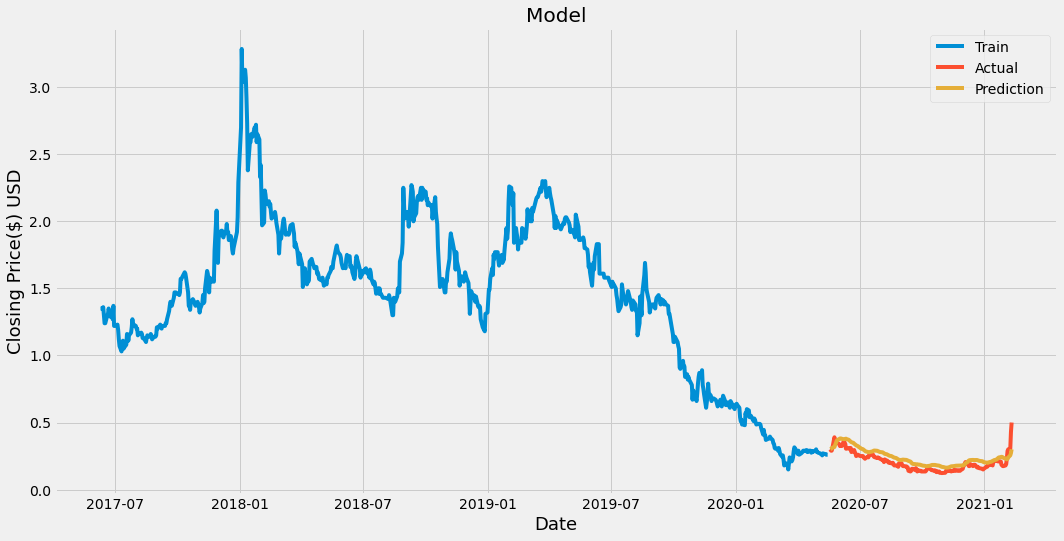

In [85]:
# plot the data
train = data[ : training_data_len]
finals = data[training_data_len : ]
finals['Prediction']= pred

# visualize the data

plt.figure (figsize= (16,8))
plt.title('Model')
plt.xlabel('Date', fontsize= 18)
plt.ylabel('Closing Price($) USD', fontsize=18)
plt.plot(train['Close'])
plt.plot(finals[['Close', 'Prediction']])
plt.legend(['Train','Actual','Prediction'], loc  = 'upper right')
plt.show()


In [86]:
# show the actual price and predicted price
finals

,Close,Prediction
Date,,
2020-05-19,0.300,0.301150
2020-05-20,0.290,0.304022
2020-05-21,0.290,0.307903
2020-05-22,0.310,0.311965
2020-05-25,0.390,0.317678
...,...,...
2021-02-04,0.288,0.228711
2021-02-05,0.300,0.239758
2021-02-08,0.305,0.255239


In [91]:
# predict for a specific date

# get the quote
stock_quote = web.DataReader('AAPL', data_source= 'yahoo', start= '2017-01-01', end= '2021-02-11')

# create new dataframe
new_df = stock_quote.filter(['Close'])

# get the 60-day closing price values and convert the df into an array
last_60_days =  new_df[-60: ].values

# scale the data to be values between 0 and 1
last_60_days_scaled = scaler.transform(last_60_days)

# create empty list
X_test = []

# Append past 60 days to the test list
X_test.append(last_60_days_scaled)

#convert the X_test to numpy array
X_test = np.array(X_test)

# reshape the data to be 3 dimensional
X_test = np.reshape(X_test, ( X_test.shape[0], X_test.shape[1] , 1))

# get predicted scaled price
pred_price = model.predict (X_test)

#undo the scaling
pred_price = scaler.inverse_transform(pred_price)
print(pred_price)


[[0.33910316]]


In [90]:
# get the quote
stock_quote2 = web.DataReader('AAPL', data_source= 'yahoo', start= '2021-02-10', end= '2021-02-10')
print(stock_quote2)


            High   Low  Open  Close    Volume  Adj Close
Date                                                    
2021-02-10   0.6  0.43  0.55    0.5  85199249        0.5
